In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import copy 

import seaborn as sns
sns.set(color_codes=True)
import os

from scipy.stats import entropy as DKL



/home/acevedo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
train_set = pd.read_csv('../data/experiment_march_21/train_set.csv', header=None) .values

In [3]:
def gan_error(gan_ds, training_ds):
    assert gan_ds.shape == training_ds.shape
    a = gan_ds.mean(axis=0)
    b = training_ds.mean(axis=0)
    return DKL(a,b)

In [4]:
def build_table(data_path, train_ds):

    old_path = os.getcwd()
    os.chdir(data_path)
    cwd = os.getcwd()

    
    directory_list=[x[0].replace(cwd,'').replace('/','') for x in os.walk(cwd,topdown=True)]
    directory_list= directory_list[1:]
    directory_list = sorted(directory_list)
        
    dkl_record = []
    
    id_sample_N = []
    id_repetition = []
    
    # print(len(directory_list))
    # For loop goes here
    for dir_k in range(len(directory_list)):

        numbers_list =(directory_list[dir_k].replace('_data','').replace('_',' ').replace('/',' ')).split(' ')


        os.chdir(directory_list[dir_k])
        ids = [int(numbers_list[k]) for k in range(len(numbers_list))]

        samples_file = 'gan_samples_'+numbers_list[0]+'_'+numbers_list[1] + '.csv'

        fake_samples = pd.read_csv(samples_file,header=None) .values
        indices =  (pd.read_csv('training_indices.csv', header=None) .values).flatten() 
        val = gan_error(fake_samples, train_ds[indices])
        
        dkl_record.append(val)
        id_sample_N.append(ids[0])
        id_repetition.append(ids[1])
        
        os.chdir(cwd)
        
        ## 

    os.chdir(old_path)
    
    plot_table = pd.DataFrame(
    {'DKL': dkl_record,
     'id_sample_N': id_sample_N,
     'id_repetition': id_repetition
    })
    
    return plot_table

In [5]:
x = build_table('../data/plot2', train_set)


In [6]:
print(x)

        DKL  id_sample_N  id_repetition
0  0.006286          300              0
1  0.005324          300              1
2  0.004088          400              0
3  0.003329          400              1
4  0.003300          500              0
5  0.002804          500              1
6  0.002339          700              0
7  0.001945          700              1


In [7]:
r = x[x.id_sample_N == 300]
r.id_sample_N

0    300
1    300
Name: id_sample_N, dtype: int64

In [8]:
def errorbar(x, y, low, high, order, color, **kws):
    xnum = [order.index(x_i) for x_i in x]
    plt.errorbar(xnum, y, (y - low, high - y), color=color)

In [9]:

def plot_gan_curve(my_dataframe):
    mean_y = []
    std_mean = []

    samples_n= np.unique(my_dataframe.id_sample_N.values)

    # Compute mean of observationsß
    for k in range(len(samples_n)):
        a = my_dataframe[my_dataframe.id_sample_N == samples_n[k]]
        #print(a.DKL.values.mean())
        mean_y.append(a.DKL.values.mean())
        
    mean_y = np.array(mean_y)
        
    std_mean = [] # Standard error of the mean

    # Compute the STD
    for k in range(len(samples_n)):
        a = my_dataframe[my_dataframe.id_sample_N == samples_n[k]]
        a = a.DKL.values
        #print(a)
        #print(a.std())
        std_mean.append(a.std()/np.sqrt(len(a))) #/ 

    std_mean =  np.array(std_mean)    

    sns.lineplot(samples_n, mean_y, marker = 'o')
    plt.errorbar(samples_n, mean_y, yerr= std_mean, fmt='o')
    plt.show()

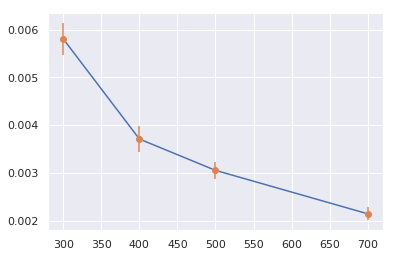

In [10]:
plot_gan_curve(x)

In [ ]:
 x[x.id_sample_N == 700]


In [ ]:
print(n)
print(xx.shape)

print(mean_y.shape)

print(y.shape)
# assert e.shape == y.shape
print(mean_y)
print(std_mean)
#plt.errorbar(n, mean_y, yerr=std_mean, fmt='o')